# Plant Disease Detection using VGG16 Transfer Learning
**Author: Durga**

This notebook uses CNN with VGG16 transfer learning to detect plant diseases using the PlantVillage dataset.

In [4]:
data_dir = '/content/drive/MyDrive/PlantVillage_Sample'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:

# 📌 Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [6]:

# 📌 Build the VGG16 Transfer Learning Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


NameError: name 'VGG16' is not defined

In [15]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PlantVillage_Sample'

In [17]:
# * Dataset Preparation

# Mount Google Drive if using Drive
from google.colab import drive
drive.mount('/content/drive')

# Set your dataset path here
data_dir = '/content/drive/MyDrive/PlantVillage_Sample'  # Adjust if your path differs

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and splitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check number of classes
num_classes = len(train_generator.class_indices)
print(f'Number of classes: {num_classes}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Number of classes: 2


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Build the VGG16 Transfer Learning Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the convolutional base

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.3125 - loss: 0.8865 - val_accuracy: 0.5000 - val_loss: 2.5963
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3750 - loss: 2.8056 - val_accuracy: 0.5000 - val_loss: 2.3462
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 3.0103 - val_accuracy: 0.5000 - val_loss: 1.3571
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5625 - loss: 1.6641 - val_accuracy: 0.5000 - val_loss: 1.8191
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.6250 - loss: 1.4737 - val_accuracy: 0.5000 - val_loss: 2.0664


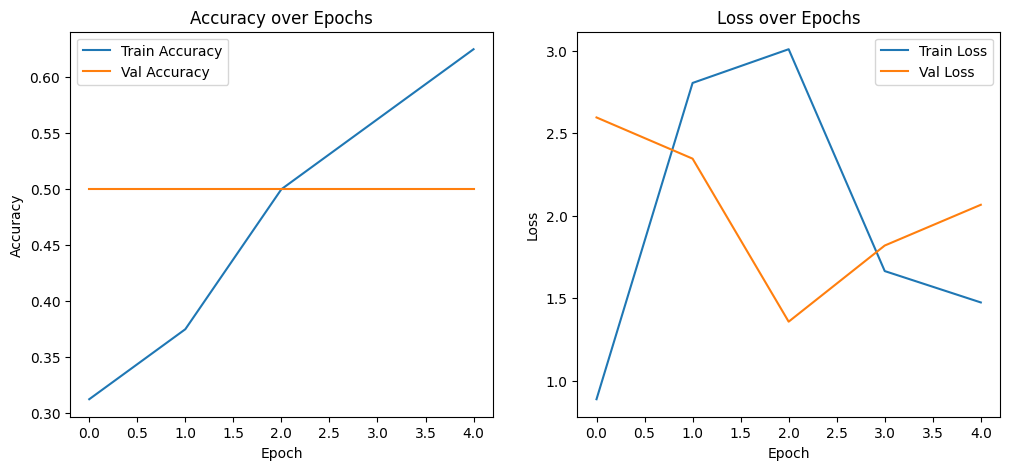

In [19]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

# 📌 Train the Model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


In [24]:
img_path = '/content/drive/MyDrive/PlantVillage_Sample/Tomato___Bacterial_spot/Tomato_1.jpg'

In [ ]:

# 📌 Plot Accuracy and Loss Graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
Predicted Class: Tomato___Bacterial_spot


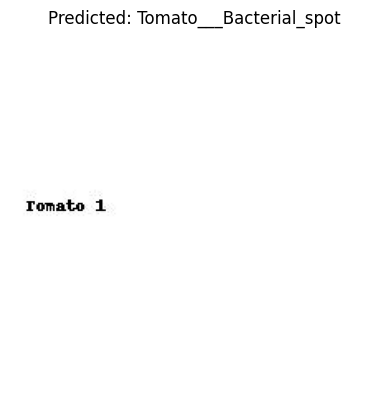

In [26]:
from tensorflow.keras.utils import load_img, img_to_array

sample_img_path = '/content/drive/MyDrive/PlantVillage_Sample/Tomato___Bacterial_spot/Tomato_1.jpg'

img = load_img(sample_img_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print("Predicted Class:", class_labels[class_index])

plt.imshow(img)
plt.title(f"Predicted: {class_labels[class_index]}")
plt.axis('off')
plt.show()

✅ **Done!** Now you can upload this notebook to your GitHub repo and add results to your `README.md` for your portfolio.